**Autor: Nikolay Kutukov**

#Přehled datasetu

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install -q dython
from dython.nominal import associations
data = pd.read_csv('fotbal_prestupy_2000_2019.csv')
csob_blue = "#24B7F1"
csob_dark_blue = "#003869"
mpl.rcParams['font.family'] = 'serif'
data.head()

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


Kontrola chybějících hodnot, jenom sloupec odhadovaná hodnota obsahuje chybějící hodnoty

In [2]:
data.isna().sum()

Jméno                    0
Pozice                   0
Věk                      0
Původní tým              0
Původní liga             0
Nový tým                 0
Nová  Liga               0
Sezóna                   0
Odhadovaná hodnota    1260
Přestupová částka        0
dtype: int64

Kontrola typu proměnných, "Odhadovaná hodnota" by měla být stejnecho typu jako "Přestupová částka", ale protože obsahuje NA nesmí být typu int

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jméno               4700 non-null   object 
 1   Pozice              4700 non-null   object 
 2   Věk                 4700 non-null   int64  
 3   Původní tým         4700 non-null   object 
 4   Původní liga        4700 non-null   object 
 5   Nový tým            4700 non-null   object 
 6   Nová  Liga          4700 non-null   object 
 7   Sezóna              4700 non-null   object 
 8   Odhadovaná hodnota  3440 non-null   float64
 9   Přestupová částka   4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


Popis numerických sloupců. Věk nula nedává smysl měli bychom to nahradit; rozsah hodnot ve sloupcích 'Odhadovaná hodnota' a 'Přestupová částka' je obrovský, má smysl použit logaritmickou škálu pro vizualizaci.

In [4]:
data.describe()

,Věk,Odhadovaná hodnota,Přestupová částka
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


V datasetu nejsou žádné duplicity

In [5]:
data.drop_duplicates().shape[0] ==  data.shape[0]

True

Složení původních a nových týmů a lig je velmi odlišné

In [6]:
print(f"Počet různých lig, které hráči opustili: {len(data['Původní liga'].unique())}")
print(f"Počet různých lig, do kterých hráči přestoupili: {len(data['Nová  Liga'].unique())}\n")
print(f"Počet různých týmů, které hráči opustili: {len(data['Původní tým'].unique())}")
print(f"Počet různých týmů, do kterých hráči přestoupili: {len(data['Nový tým'].unique())}")

Počet různých lig, které hráči opustili: 118
Počet různých lig, do kterých hráči přestoupili: 65

Počet různých týmů, které hráči opustili: 570
Počet různých týmů, do kterých hráči přestoupili: 325


#Čištění a transformace dat

In [7]:
data_cl = data.copy() #vytvořime novou proměnnou pro čištění dat

In [8]:
data_cl[data_cl['Věk']<16] #Marzouqovi Al-Otaibimu bylo 24 let v roce 2000

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,NaN,2000000
1370,Fran Mérida,Central Midfield,15,Barcelona Yth.,Spain,Arsenal U18,England,2005-2006,NaN,3200000


In [9]:
data_cl.loc[data_cl['Jméno']=='Marzouq Al-Otaibi', 'Věk']=24

Hodnoty ve sloupci "A" jsou špatně čitelné, změňme škalu na miliony

In [10]:
data_cl.head(1)

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000


In [11]:
data_cl['Odhadovaná hodnota'] /= 10**6
data_cl['Přestupová částka'] /= 10**6
pd.concat([data.head(1), data_cl.head(1)])

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000.0
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60.0


Hodnoty "Forward", "Sweeper", "Defender" a "Midfielder" mají příliš malé počty, tato pozorování necháme v datovém souboru, ale vyloučíme je pro analýzu podle pozic

In [12]:
data_cl['Pozice'].value_counts()

Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Forward                  3
Sweeper                  1
Defender                 1
Midfielder               1
Name: Pozice, dtype: int64

In [13]:
data[data['Pozice'].isin(['Forward', 'Sweeper', 'Defender', 'Midfielder'])]

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
188,Didier Martel,Forward,28,FC Utrecht,Eredivisie,Vitesse,Eredivisie,2000-2001,NaN,2750000
242,Patricio Camps,Forward,28,Vélez Sarsfield,Argentina,PAOK Saloniki,Super League,2000-2001,NaN,1850000
471,Thomas Hengen,Sweeper,26,VfL Wolfsburg,1.Bundesliga,1.FC K'lautern,1.Bundesliga,2001-2002,NaN,2250000
652,Sergio Hellings,Defender,17,Ajax U19,U19 Eredivisie,Anderlecht U19,Belgium,2002-2003,NaN,2000000
653,Mazhar Abdelrahman,Forward,25,El Masry,Premier League,Monaco,Ligue 1,2002-2003,NaN,2000000
705,Tony Dinning,Midfielder,27,Wolves,First Division,Wigan,Second Division (bis 03/04),2002-2003,NaN,1130000


#Vizualizace

 Z korelační matice vidíme, že hodnota přestupové částky silně souvisí se samotným hráčem, týmem, za který hraje, a sezónou, ve které se přestup uskutečnil. V menší míře s ligou, která úzce souvisí s týmem, a pozicí hráče. Věk hráče nemá na velikost přestupu žádný vliv.

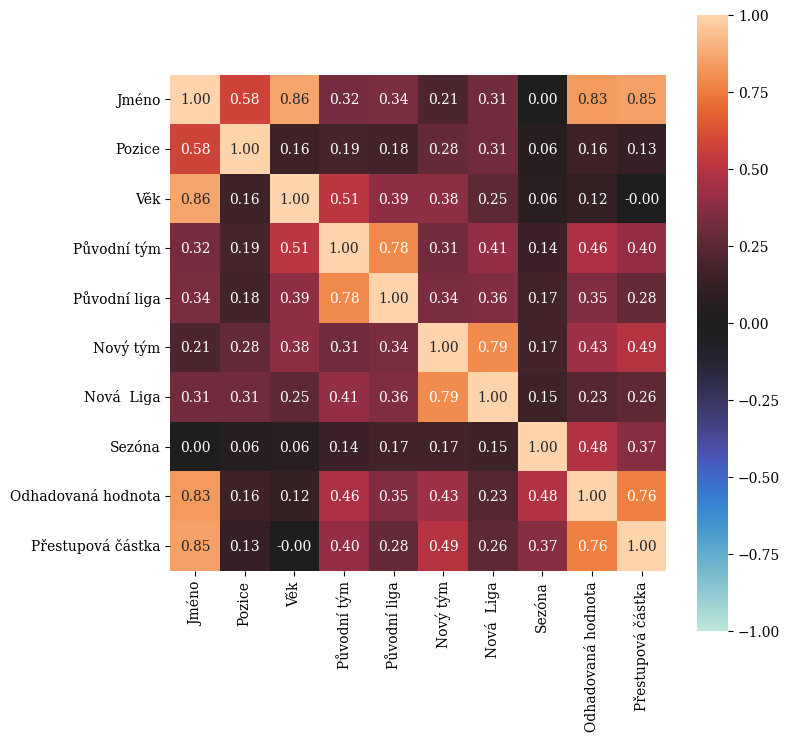

In [14]:
#@title Korelační matice

complete_correlation= associations(data, filename= 'complete_correlation.png', figsize=(8,8))
df_complete_corr=complete_correlation['corr']

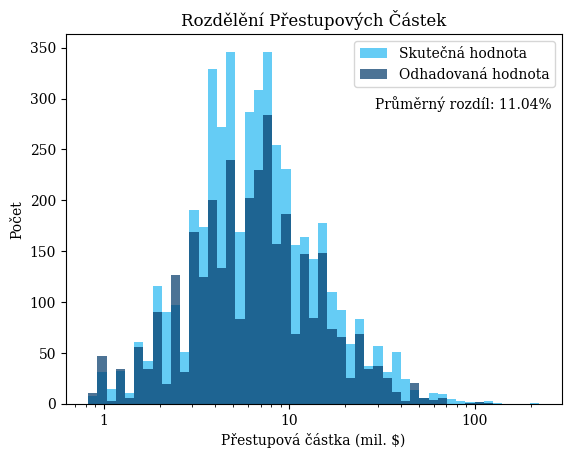

In [32]:
#@title Odhad je často menší než skutečná částka, v průměru o 11%.
import matplotlib.ticker as ticker
#function to change the format of values on X axis from powers of 10 to general
def format_fn(tick_val, _):
        return f"{int(tick_val)}"

avg_dif = round(((data['Přestupová částka'] - data['Odhadovaná hodnota'])/data['Přestupová částka']).mean() * 100, 2)
transfer_val = data_cl['Přestupová částka']
pred_val = data_cl['Odhadovaná hodnota']
avg_dif = round(((data['Přestupová částka'] - data['Odhadovaná hodnota'])/data['Přestupová částka']).mean() * 100, 2)
bins = np.logspace(np.log10(min(transfer_val)), np.log10(max(transfer_val)), 50)


plt.hist(transfer_val, bins=bins, alpha=0.7, color=csob_blue, label='Skutečná hodnota')
plt.hist(pred_val, bins=bins, alpha=0.7, color=csob_dark_blue, label='Odhadovaná hodnota')
plt.text(29,290, "Průměrný rozdíl: " + str(avg_dif) + "%")
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_fn))
plt.title('Rozdělění Přestupových Částek')
plt.xlabel('Přestupová částka (mil. $)')
plt.ylabel('Počet')
plt.legend()
plt.show()

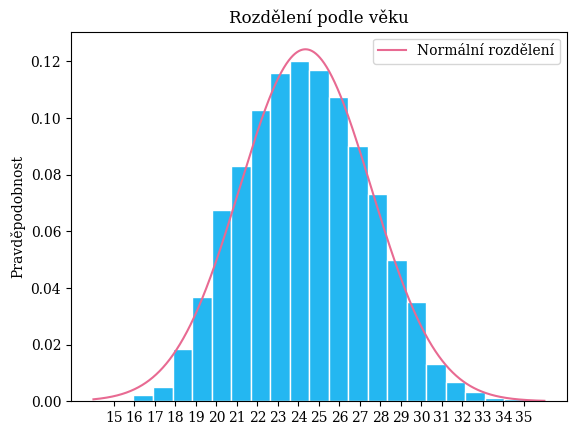

In [16]:
#@title Věkové rozdělení je velmi podobné normalnímu rozdělení.
from scipy.stats import norm
age_norm = np.random.normal(data_cl['Věk'].mean(),data_cl['Věk'].std(), len(data_cl['Věk']))
plt.hist(data_cl['Věk'], bins = data_cl['Věk'].nunique(), density = True, color = csob_blue, edgecolor='white')

mu, std = norm.fit(data_cl['Věk'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(data_cl['Věk']))
p = norm.pdf(x, mu, std)
plt.plot(x, p, color = "#E86A92", label="Normální rozdělení")
plt.xticks(data_cl['Věk'].unique())
plt.title('Rozdělení podle věku')
plt.ylabel('Pravděpodobnost')
plt.legend()
plt.show()

###Pozice

Pro analyzu pozic budou pozice Midfielder, Defender, Forward a Sweeper vyloučený.

In [17]:
data_pos = data_cl.groupby(by='Pozice').mean(numeric_only=True).sort_values(by='Přestupová částka', ascending= True)
data_pos

,Věk,Odhadovaná hodnota,Přestupová částka
Pozice,,,
Midfielder,27.000000,NaN,1.130000
Defender,17.000000,NaN,2.000000
Forward,27.000000,NaN,2.200000
Sweeper,26.000000,NaN,2.250000
Left Midfield,25.356322,7.040556,6.717126
Right Midfield,24.904762,5.585714,7.404127
Goalkeeper,26.022222,6.894958,7.622667
Left-Back,24.128889,6.698676,7.718933
Right-Back,24.154696,8.126639,8.254309


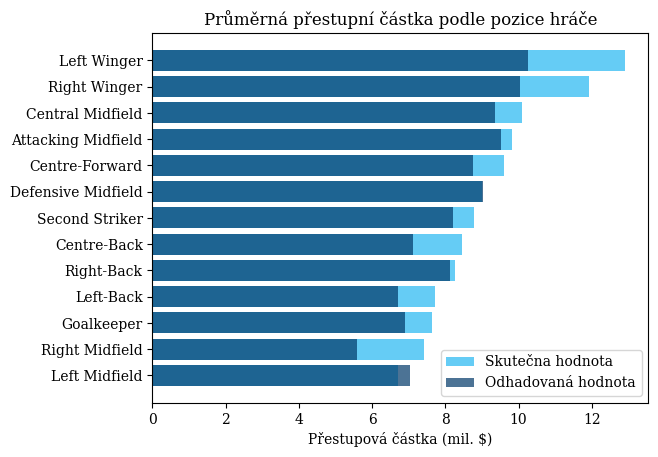

In [31]:
#@title Hráči na útočné pozici jsou v průměru hodnoceni mnohem více než ostatní.
data_pos_cl = data_pos[~data_pos.index.isin(['Forward', 'Sweeper', 'Defender', 'Midfielder'])]
plt.barh(y = data_pos_cl.index, width = data_pos_cl['Přestupová částka'], color=csob_blue, alpha=0.7, label='Skutečna hodnota')
plt.barh(y = data_pos_cl.index, width = data_pos_cl['Odhadovaná hodnota'], color=csob_dark_blue, alpha=0.7, label='Odhadovaná hodnota')
plt.xlabel('Přestupová částka (mil. $)')
plt.title('Průměrná přestupní částka podle pozice hráče')
plt.legend()
plt.show()

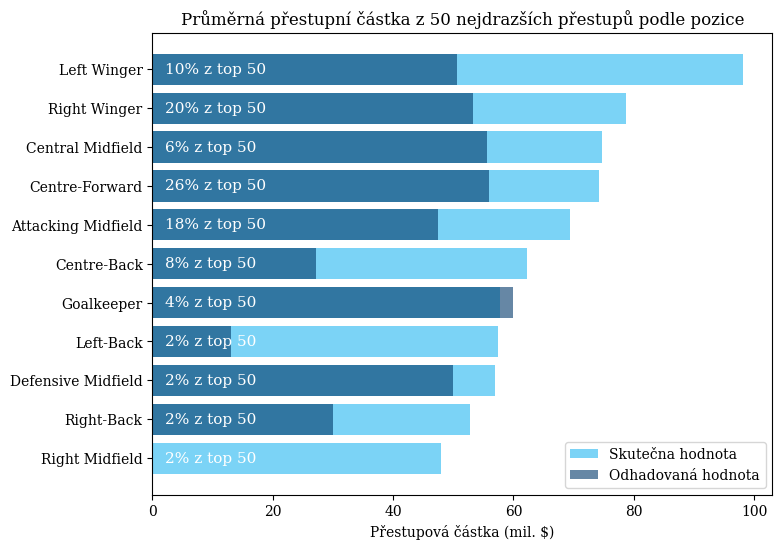

In [19]:
#@title Pokud se podíváme na 50 nejdražších přestupů je rozdíl v ceně útočících hráčů ještě výraznější. Hráči na obranných pozicích jsou v první padesátce zastoupeni mnohem méně.
data_pos_top = data_cl.nlargest(50, 'Přestupová částka').groupby(by='Pozice').mean(numeric_only=True).sort_values(by='Přestupová částka', ascending= True)
pos_counts = data_cl.nlargest(50, 'Přestupová částka')['Pozice'].value_counts()
data_pos_top = pd.merge(data_pos_top, pos_counts, left_index=True, right_index=True)
plt.figure(figsize=(8,6))
plt.barh(y = data_pos_top.index, width = data_pos_top['Přestupová částka'], color=csob_blue, alpha=0.6, label='Skutečna hodnota')
plt.barh(y = data_pos_top.index, width = data_pos_top['Odhadovaná hodnota'], color=csob_dark_blue, alpha=0.6, label='Odhadovaná hodnota')
plt.xlabel('Přestupová částka (mil. $)')
plt.title('Průměrná přestupní částka z 50 nejdrazších přestupů podle pozice')
plt.legend(loc='lower right')
for index, value in enumerate(data_pos_top['Přestupová částka']):
    plt.text(2, index,
             str(round(data_pos_top['Pozice'].iloc[index]*100/50)) + "% z top 50",
             va='center', color = 'white', fontsize=11)
plt.show()

##Týmy

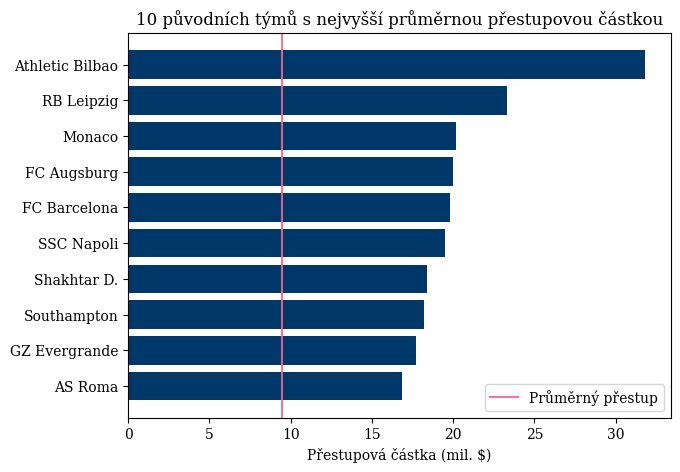

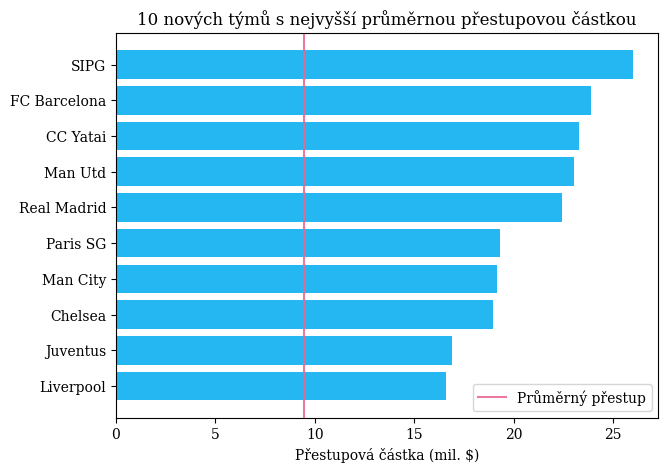

In [20]:
#@title Athletic Bilbao je velmi úspěšný klub se silnými hráči, ale nedělá velké přestupy, protože v tomto klubu mohou hrát pouze Baskové.
data_tt = data_cl.groupby(by='Nový tým').mean(numeric_only=True).sort_values(by='Přestupová částka', ascending=True)
data_tf = data_cl.groupby(by='Původní tým').mean(numeric_only=True).sort_values(by='Přestupová částka', ascending=True)

plt.figure(figsize=(7,5))
plt.barh(y = data_tf.tail(10).index, width = data_tf.tail(10)['Přestupová částka'], color = csob_dark_blue)
plt.axvline(data_cl['Přestupová částka'].mean(), color = '#E86A92', alpha = 0.9, label = 'Průměrný přestup')
plt.xlabel('Přestupová částka (mil. $)')
plt.legend(loc='lower right')
plt.title('10 původních týmů s nejvyšší průměrnou přestupovou částkou')
plt.show()

plt.figure(figsize=(7,5))
plt.barh(y = data_tt.tail(10).index, width = data_tt.tail(10)['Přestupová částka'], color = csob_blue)
plt.axvline(data_cl['Přestupová částka'].mean(), color = '#E86A92', alpha = 0.9, label = 'Průměrný přestup')
plt.xlabel('Přestupová částka (mil. $)')
plt.legend(loc='lower right')
plt.title('10 nových týmů s nejvyšší průměrnou přestupovou částkou')
plt.show()

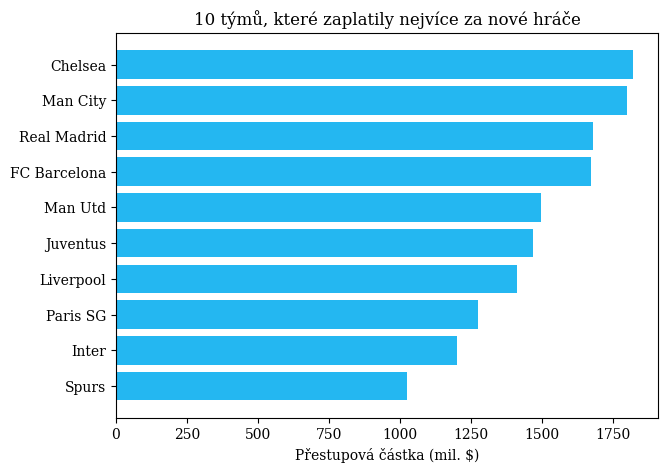

In [21]:
#@title 10 týmů, které zaplatily nejvíce za nové hráče. Seznam se skládá výhradně z klubů západní Evropy.
data_tt2 = data_cl.groupby(by='Nový tým').sum(numeric_only=True).sort_values(by='Přestupová částka', ascending=True)

plt.figure(figsize=(7,5))
plt.barh(y = data_tt2.tail(10).index, width = data_tt2.tail(10)['Přestupová částka'], color = csob_blue)
plt.xlabel('Přestupová částka (mil. $)')
plt.title('10 týmů, které zaplatily nejvíce za nové hráče')
plt.show()

Rozdělme týmy a ligy na "Top" a "Low".


"Top" jsou ligy a týmy, do kterých přestoupil aspoň jeden hráč, a "Low" ligy a týmy, do kterých žádný hráč nepřestoupil.


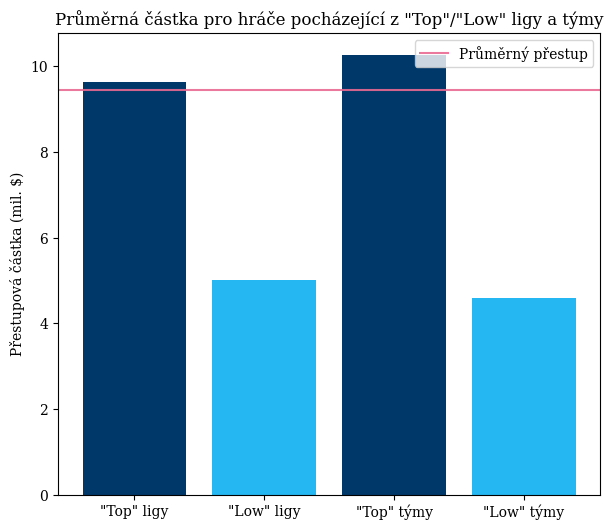

In [22]:
#@title Porovnejme, jak se liší cena přestupu, pokud hráč pochází z "top" ligy nebo týmu a pokud pochází z "low" ligy nebo týmu.

dif_teams = [league not in data_cl['Nový tým'].unique() for league in data_cl['Původní tým'].unique()]
low_teams = data_cl['Původní tým'].unique()[dif_teams]
top_teams =  data_cl['Nový tým'].unique()
top_teams_avg = data_cl[data_cl['Původní tým'].isin(top_teams)]['Přestupová částka'].mean()
low_teams_avg = data_cl[data_cl['Původní tým'].isin(low_teams)]['Přestupová částka'].mean()

dif_leagues = [league not in data_cl['Nová  Liga'].unique() for league in data_cl['Původní liga'].unique()]
low_leagues = data_cl['Původní liga'].unique()[dif_leagues]
top_leagues =  data_cl['Nová  Liga'].unique()
top_leagues_avg = data_cl[data_cl['Původní liga'].isin(top_leagues)]['Přestupová částka'].mean()
low_leagues_avg = data_cl[data_cl['Původní liga'].isin(low_leagues)]['Přestupová částka'].mean()

values = [top_leagues_avg, low_leagues_avg, top_teams_avg, low_teams_avg]
labels = ['"Top" ligy', '"Low" ligy', '"Top" týmy', '"Low" týmy']
colors = [csob_dark_blue, csob_blue, csob_dark_blue, csob_blue]
plt.figure(figsize=(7,6))
plt.axhline(data_cl['Přestupová částka'].mean(), color = '#E86A92', alpha = 0.9, label = 'Průměrný přestup')
plt.bar(height = values, x = labels, color = colors)
plt.title('Průměrná částka pro hráče pocházející z "Top"/"Low" ligy a týmy')
plt.ylabel('Přestupová částka (mil. $)')
plt.legend(loc='upper right')
plt.show()

##Hráče

V datasetu jsou hráče se stejnými křestními jmény, nechame jenom jména, které obsahuji aspoň 2 slova, aby spravně spočitat počet transferu pro každého hráče

In [39]:
first_and_last = data_cl['Jméno'].apply(lambda x: len(str(x).split())) > 1
filtered_df = data_cl[first_and_last]

<ipython-input-24-bd7b3d93e8ee>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


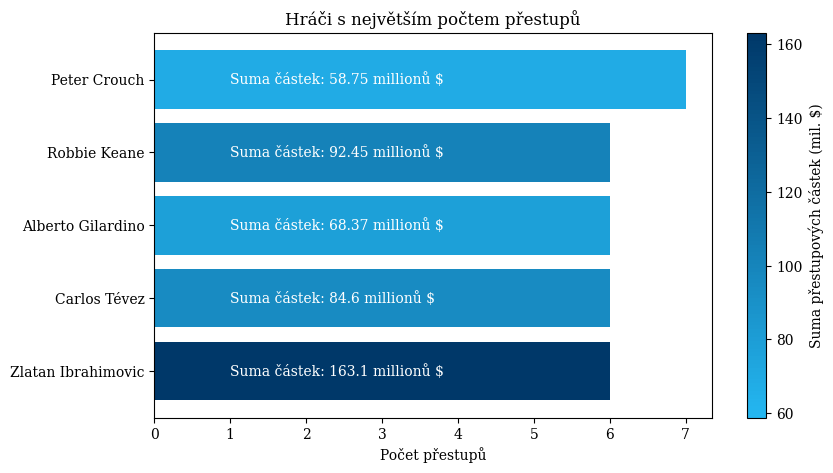

In [24]:
#@title Podívejme se na 5 hráčů s největším počtem přestupů, můžeme konstatovat, že více přestupů neznamená více peněz.
from matplotlib.colors import LinearSegmentedColormap
most_transfers = filtered_df.groupby('Jméno').agg({'Nový tým':'count', 'Přestupová částka':'sum'}).sort_values(by='Nový tým', ascending=True).tail()

colors = [csob_blue, csob_dark_blue]
colormap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)
values = most_transfers['Přestupová částka']
normalized_values = (values - min(values)+ 10) / (max(values) - min(values))
plt.figure(figsize=(9,5))
plt.barh(y=most_transfers.index, width = most_transfers['Nový tým'], color=colormap(normalized_values))
plt.title('Hráči s největším počtem přestupů')
plt.xlabel('Počet přestupů')
for index, value in enumerate(most_transfers['Nový tým']):
    plt.text(1, index,
             'Suma částek: ' + str(most_transfers['Přestupová částka'].iloc[index]) + ' millionů $',
             va='center', color = 'white', fontsize=10)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
cbar = plt.colorbar(sm)
cbar.set_label('Suma přestupových částek (mil. $)')

plt.show()

##Sezóna

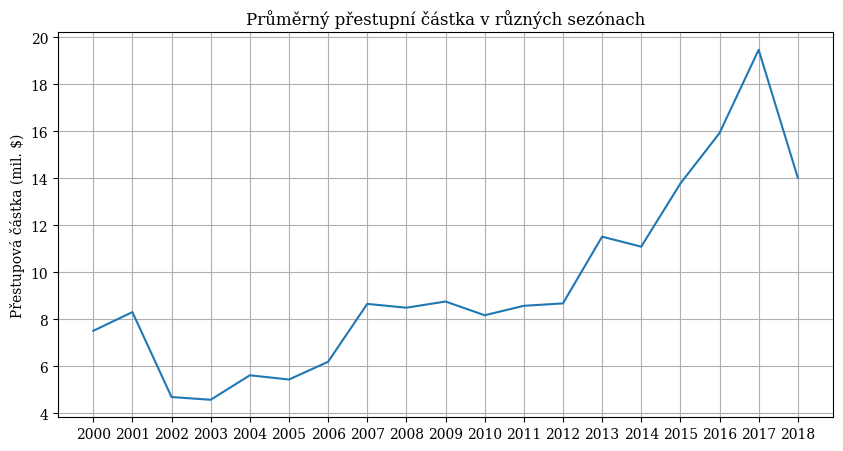

In [25]:
#@title Graf ukazuje dynamiku průměrných hodnot fotbalových přestupů, míra růstu přestupových cen zní vyšší než inflace, možná fotbalisté nejsou špatnou investicí.
transfers_time_mean = data_cl.groupby(by='Sezóna').mean(numeric_only=True)
transfers_time_max = data_cl.groupby(by='Sezóna').max(numeric_only=True)
transfers_time_mean.index = transfers_time_mean.index.to_series().apply(lambda x: str(x)[:4])
transfers_time_max.index = transfers_time_mean.index.to_series().apply(lambda x: str(x)[:4])

plt.figure(figsize=(10, 5))
plt.plot(transfers_time_mean['Přestupová částka'])
plt.grid()
plt.ylabel('Přestupová částka (mil. $)')
plt.title('Průměrný přestupní částka v různých sezónach')
plt.show()

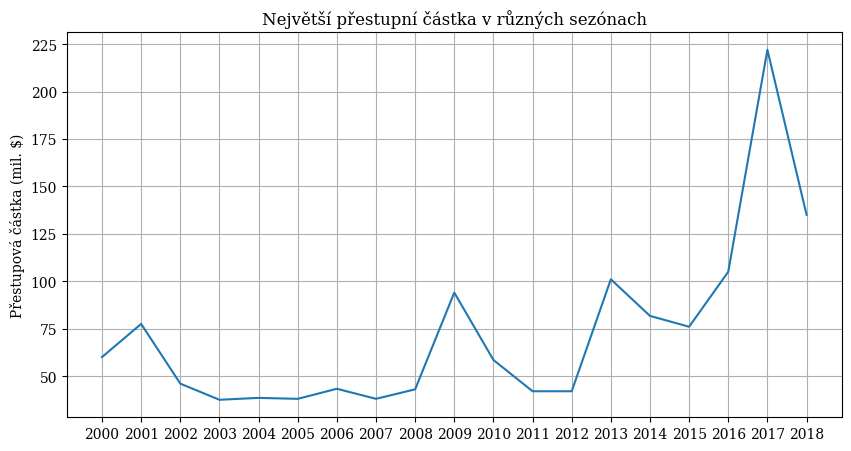

In [26]:
#@title Velikost maximálního přestupu obecně odpovídá vývoji průměrných přestupů.
plt.figure(figsize=(10, 5))
plt.plot(transfers_time_max['Přestupová částka'])
plt.grid()
plt.ylabel('Přestupová částka (mil. $)')
plt.title('Největší přestupní částka v různých sezónach')
plt.show()

##Obecné charakteristiky

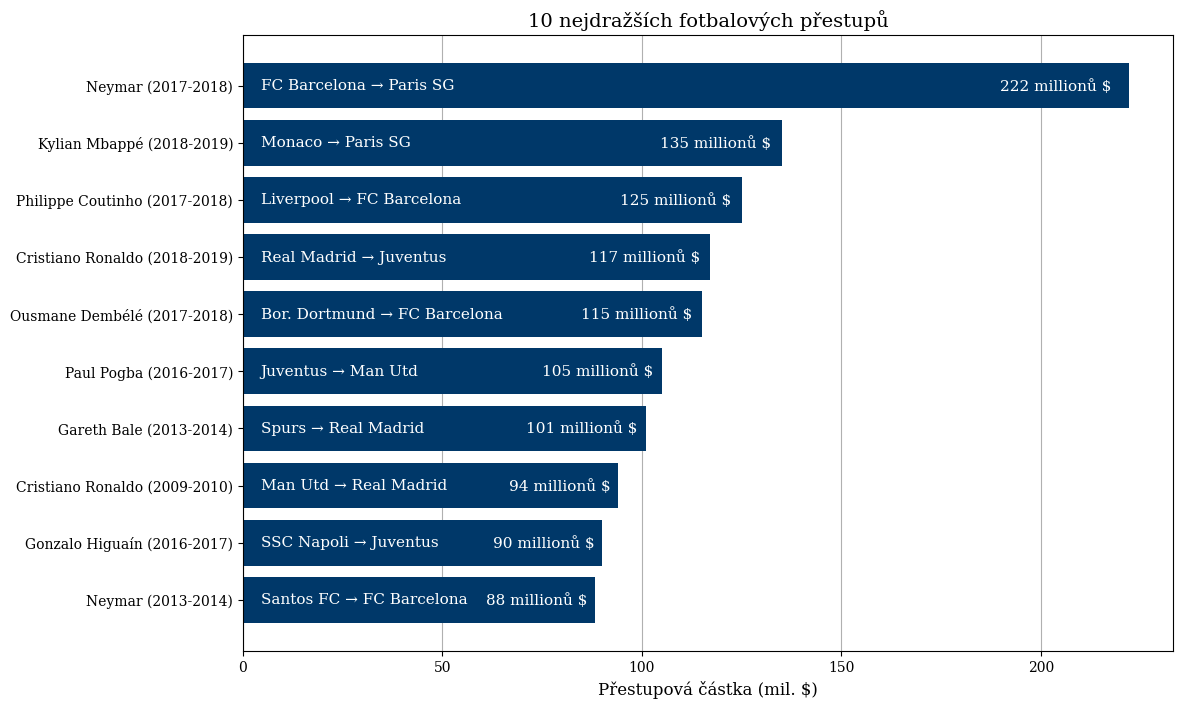

In [43]:
#@title Tento graf poskytuje přehled deseti nejdražších přestupů do sezóny 2018-2019
top_transfers = data_cl.sort_values(by='Přestupová částka', ascending=False).head(10)
top_transfers = top_transfers.sort_values(by='Přestupová částka')
top_transfers['Jméno_unique'] = top_transfers['Jméno'] + ' (' + top_transfers['Sezóna'] + ')'
plt.figure(figsize=(12, 8))

plt.barh(y = top_transfers['Jméno_unique'], width=top_transfers['Přestupová částka'], color = csob_dark_blue, zorder=2)
plt.xlabel('Přestupová částka (mil. $)', fontsize=12)
fixed_position = min(top_transfers['Přestupová částka']) * 0.05
for index, value in enumerate(top_transfers['Přestupová částka']):
    plt.text(fixed_position, index,
             str(top_transfers['Původní tým'].iloc[index]) + ' → ' + str(top_transfers['Nový tým'].iloc[index]),
             va='center', color = 'white', fontsize=11)
for index, value in enumerate(top_transfers['Přestupová částka']):
    plt.text(value - value*0.02, index, str(int(value)) + ' millionů $', va='center', ha='right',
             color='white', fontsize=11)
plt.title('10 nejdražších fotbalových přestupů', fontsize = 14)
plt.grid(axis= 'x', zorder = 0)
plt.show()

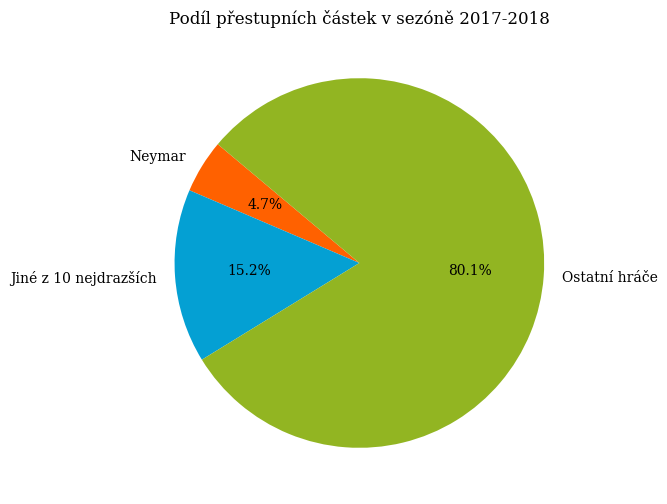

In [38]:
#@title Podívejme se na údaje o přestupech v sezóně 2017-2018, kdy došlo k nejdražšímu přestupu v historii.
season_data = data_cl[data_cl['Sezóna'] == '2017-2018']

most_expensive_transfer = season_data.loc[season_data['Přestupová částka'].idxmax()]

total_fee_most_expensive = most_expensive_transfer['Přestupová částka']
total_fee_others = season_data['Přestupová částka'].sum() - total_fee_most_expensive

import matplotlib.pyplot as plt

top_10_transfers = season_data.nlargest(10, 'Přestupová částka')

total_next_top_9 = top_10_transfers['Přestupová částka'].sum() - total_fee_most_expensive

total_fee_outside_top_10 = season_data['Přestupová částka'].sum() - top_10_transfers['Přestupová částka'].sum()

labels = ['Neymar', 'Jiné z 10 nejdrazších', 'Ostatní hráče']
sizes = [total_fee_most_expensive, total_next_top_9, total_fee_outside_top_10]
colors=['#FF6100', '#04A0D3', '#92B522']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Podíl přestupních částek v sezóně 2017-2018')
plt.show()

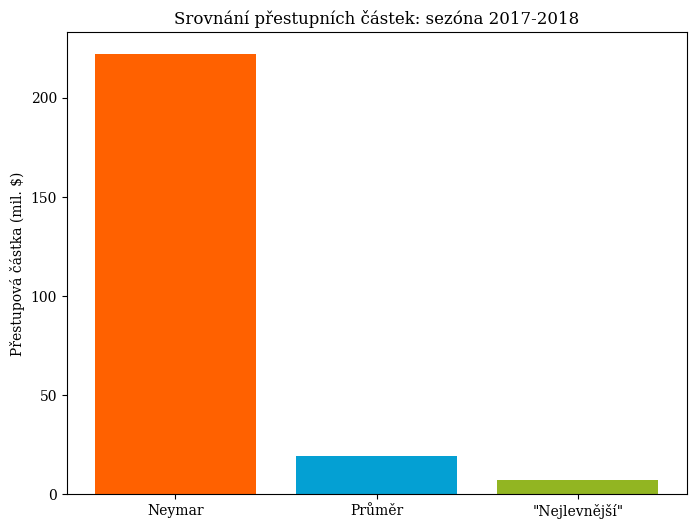

In [29]:
#@title Porovnejme Neymarův přestup s průměrným a "nejlevnějším" přestupem v sezóně 2017-2018, abychom si uvědomili, jak drahý vyšel pro klub PSG. Je 11krát dražší než průměrný přestup v sezoně a 31krát dražší než ten "nejlevnější".
average_transfer_fee = season_data['Přestupová částka'].mean()

cheapest_transfer_fee = season_data['Přestupová částka'].min()

categories = ['Neymar', 'Průměr', '"Nejlevnější"']
values = [total_fee_most_expensive, average_transfer_fee, cheapest_transfer_fee]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['#FF6100', '#04A0D3', '#92B522'])
plt.title('Srovnání přestupních částek: sezóna 2017-2018')
plt.ylabel('Přestupová částka (mil. $)')
plt.show()